In [30]:
from google.colab import files
uploaded = files.upload()

Saving train2.csv to train2.csv


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Item Demand Forecasting**

In [33]:
import io
item_demand = pd.read_csv(io.BytesIO(uploaded['train2.csv']))

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/train_csv.csv')

In [34]:
item_demand.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [35]:
item_demand.tail()


,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [36]:
item_demand.shape

(913000, 4)

In [37]:
item_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [38]:
item_demand['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [39]:
item_demand['item'].value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

In [40]:
item_demand.isnull().any().sum()

0

In [41]:
# How many stores and items are there?
item_demand['store'].nunique(), item_demand['item'].nunique()

(10, 50)

In [43]:
#time range
item_demand["date"].min(), item_demand["date"].max()

('2013-01-01', '2017-12-31')

In [44]:
gb = item_demand.groupby(['item','date'])['sales'].sum()

In [45]:
gb.index

MultiIndex([( 1, '2013-01-01'),
            ( 1, '2013-01-02'),
            ( 1, '2013-01-03'),
            ( 1, '2013-01-04'),
            ( 1, '2013-01-05'),
            ( 1, '2013-01-06'),
            ( 1, '2013-01-07'),
            ( 1, '2013-01-08'),
            ( 1, '2013-01-09'),
            ( 1, '2013-01-10'),
            ...
            (50, '2017-12-22'),
            (50, '2017-12-23'),
            (50, '2017-12-24'),
            (50, '2017-12-25'),
            (50, '2017-12-26'),
            (50, '2017-12-27'),
            (50, '2017-12-28'),
            (50, '2017-12-29'),
            (50, '2017-12-30'),
            (50, '2017-12-31')],
           names=['item', 'date'], length=91300)

In [46]:
gb.head(10)

item  date      
1     2013-01-01    133
      2013-01-02     99
      2013-01-03    127
      2013-01-04    145
      2013-01-05    149
      2013-01-06    149
      2013-01-07     92
      2013-01-08    119
      2013-01-09    114
      2013-01-10    103
Name: sales, dtype: int64

In [47]:
gb.tail(10)

item  date      
50    2017-12-22    585
      2017-12-23    617
      2017-12-24    680
      2017-12-25    422
      2017-12-26    479
      2017-12-27    511
      2017-12-28    587
      2017-12-29    596
      2017-12-30    612
      2017-12-31    626
Name: sales, dtype: int64

In [48]:
item_demand.groupby('store').agg({'item':'count'})

,item
store,
1,91300
2,91300
3,91300
4,91300
5,91300
6,91300
7,91300
8,91300
9,91300


In [49]:
item_demand.groupby('store').agg({'sales' : 'mean'}).sort_values('sales', ascending = False)

,sales
store,
2,67.033165
8,64.142048
3,59.530602
10,58.709288
9,55.049025
4,54.902946
1,47.268379
5,39.770164
6,39.733516


In [50]:
## Summary Stats for each store
item_demand.groupby(["store"]).agg({"sales": ["count", "sum", "mean", "median", "std", "min", "max"]})

sales                                               
       count      sum       mean median        std min  max
store                                                      
1      91300  4315603  47.268379   44.0  24.006252   1  155
2      91300  6120128  67.033165   62.0  33.595810   3  231
3      91300  5435144  59.530602   55.0  29.974102   3  196
4      91300  5012639  54.902946   51.0  27.733097   4  186
5      91300  3631016  39.770164   37.0  20.365757   2  130
6      91300  3627670  39.733516   37.0  20.310451   0  134
7      91300  3320009  36.363735   34.0  18.684825   1  122
8      91300  5856169  64.142048   60.0  32.231751   4  204
9      91300  5025976  55.049025   51.0  27.832186   4  195
10     91300  5360158  58.709288   54.0  29.554994   3  187

In [51]:
# Summary Stats for each item
item_demand.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     18260   401384  21.981599   21.0   8.468922   1   59
2     18260  1069564  58.574151   56.0  20.093015   9  150
3     18260   669087  36.642223   35.0  13.179441   7  104
4     18260   401907  22.010241   21.0   8.403898   0   66
5     18260   335230  18.358708   18.0   7.265167   1   50
6     18260  1068281  58.503888   56.0  20.174898  11  148
7     18260  1068777  58.531051   56.0  20.146002  11  141
8     18260  1405108  76.950055   74.0  26.130697  15  181
9     18260   938379  51.389869   49.5  17.790158   6  134
10    18260  1337133  73.227437   70.0  24.823725  14  175
11    18260  1271925  69.656353   67.0  23.744732  11  170
12    18260  1271534  69.634940   67.0  23.738663  12  170
13    18260  1539621  84.316594   81.0  28.311031  20  210
14    18260  1071531  58.681873   56.0  20.079860  12  152
15    18260  1607442  88.030778   85.0  29.522852  17  231
16    18260   468480  25.656079   25.0   9.603270   2   70
17    18260   602486  32.994852   32.0  11.967610   4   83
18    18260  1538876  84.275794   81.0  28.430621  18  208
19    18260   736892  40.355531   39.0  14.332645   5   99
20    18260   867641  47.515936   46.0  16.490487   9  127
21    18260   736190  40.317087   39.0  14.338006   7  109
22    18260  1469971  80.502245   78.0  27.118163  14  214
23    18260   534979  29.297864   28.0  10.819549   3   81
24    18260  1205975  66.044633   64.0  22.531555  14  156
25    18260  1473334  80.686418   78.0  27.238817  18  193
26    18260   869981  47.644085   46.0  16.723912   8  119
27    18260   402628  22.049726   21.0   8.461641   1   59
28    18260  1604713  87.881325   85.0  29.501781  16  206
29    18260  1271240  69.618839   67.0  23.635631  15  173
30    18260   736554  40.337021   39.0  14.363331   5  115
31    18260  1070845  58.644304   57.0  20.104705  10  159
32    18260   803107  43.981763   42.0  15.574556   5  119
33    18260  1270183  69.560953   67.0  23.718343  15  169
34    18260   469935  25.735761   25.0   9.617910   2   79
35    18260  1201541  65.801807   63.0  22.461990  12  168
36    18260  1406548  77.028916   74.0  26.067440  16  188
37    18260   534258  29.258379   28.0  10.771547   3   74
38    18260  1470330  80.521906   77.0  27.141799  15  188
39    18260   801311  43.883406   42.0  15.511550   7  112
40    18260   534094  29.249398   28.0  10.822959   3   74
41    18260   401759  22.002136   21.0   8.402470   2   60
42    18260   669925  36.688116   35.0  13.215112   5   96
43    18260   936635  51.294359   49.0  17.801008   9  126
44    18260   536811  29.398193   28.0  10.797738   3   78
45    18260  1471467  80.584173   78.0  27.318402  18  205
46    18260  1070764  58.639869   56.0  20.220879  11  150
47    18260   401781  22.003341   21.0   8.420102   2   61
48    18260   937703  51.352848   49.0  17.881917   8  130
49    18260   535663  29.335323   28.0  10.874788   3   77
50    18260  1203009  65.882202   63.0  22.416031  12  164

In [52]:
item_demand['date'] = pd.to_datetime(item_demand['date'])

In [53]:
item_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [54]:
item_demand.date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: date, Length: 913000, dtype: datetime64[ns]

In [55]:
item_demand.date.dt.weekday

0         1
1         2
2         3
3         4
4         5
         ..
912995    2
912996    3
912997    4
912998    5
912999    6
Name: date, Length: 913000, dtype: int64

In [67]:
def create_date_features(item_demand):
    item_demand['month'] = item_demand.date.dt.month
    item_demand['day_of_month'] = item_demand.date.dt.day
    item_demand['day_of_year'] = item_demand.date.dt.dayofyear
    item_demand['week_of_year'] = item_demand.date.dt.weekofyear
    item_demand['day_of_week'] = item_demand.date.dt.dayofweek + 1
    item_demand['year'] = item_demand.date.dt.year
    item_demand["is_wknd"] = item_demand.date.dt.weekday // 4  
    item_demand['is_month_start'] = item_demand.date.dt.is_month_start.astype(int)  
    item_demand['is_month_end'] = item_demand.date.dt.is_month_end.astype(int)   
    return item_demand


item_demand = create_date_features(item_demand)
item_demand.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,date,store,item,sales,month,day_of_month,day_of_year,week_of_year,year,is_month_start,is_month_end,day_of_week,is_wknd
0,2013-01-01,1,1,2.639057,1,1,1,1,2013,1,0,2,0
1,2013-01-02,1,1,2.484907,1,2,2,1,2013,0,0,3,0
2,2013-01-03,1,1,2.708050,1,3,3,1,2013,0,0,4,0
3,2013-01-04,1,1,2.639057,1,4,4,1,2013,0,0,5,1
4,2013-01-05,1,1,2.397895,1,5,5,1,2013,0,0,6,1


In [57]:
item_demand.tail()

,date,store,item,sales,month,day_of_month,day_of_year,week_of_year,year,is_month_start,is_month_end
912995,2017-12-27,10,50,63,12,27,361,52,2017,0,0
912996,2017-12-28,10,50,59,12,28,362,52,2017,0,0
912997,2017-12-29,10,50,74,12,29,363,52,2017,0,0
912998,2017-12-30,10,50,62,12,30,364,52,2017,0,0
912999,2017-12-31,10,50,82,12,31,365,52,2017,0,1


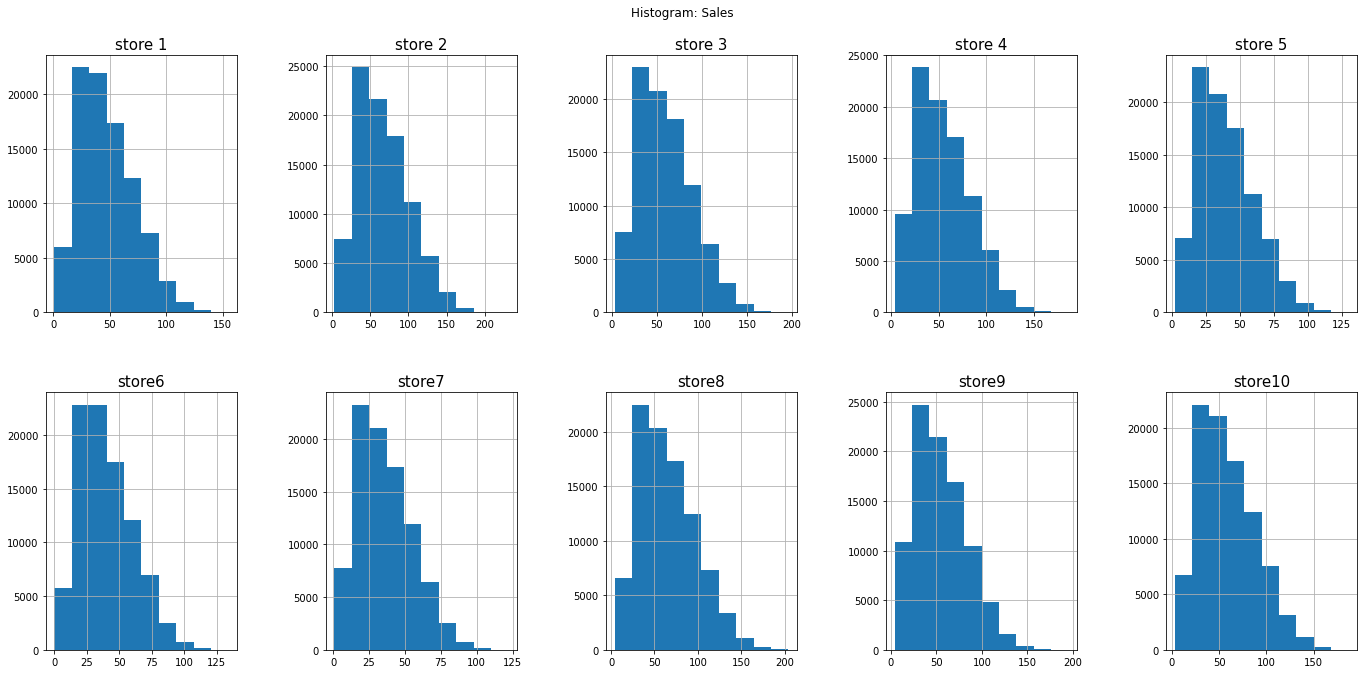

In [58]:
#store sales
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(1,11):
    if i < 6:
        item_demand[item_demand.store == i].sales.hist(ax=axes[0, i-1])
        axes[0,i-1].set_title("store " + str(i), fontsize = 15)
        
    else:
        item_demand[item_demand.store == i].sales.hist(ax=axes[1, i - 6])
        axes[1,i-6].set_title("store" + str(i), fontsize = 15)
plt.tight_layout(pad=4.5)
plt.suptitle("Histogram: Sales");

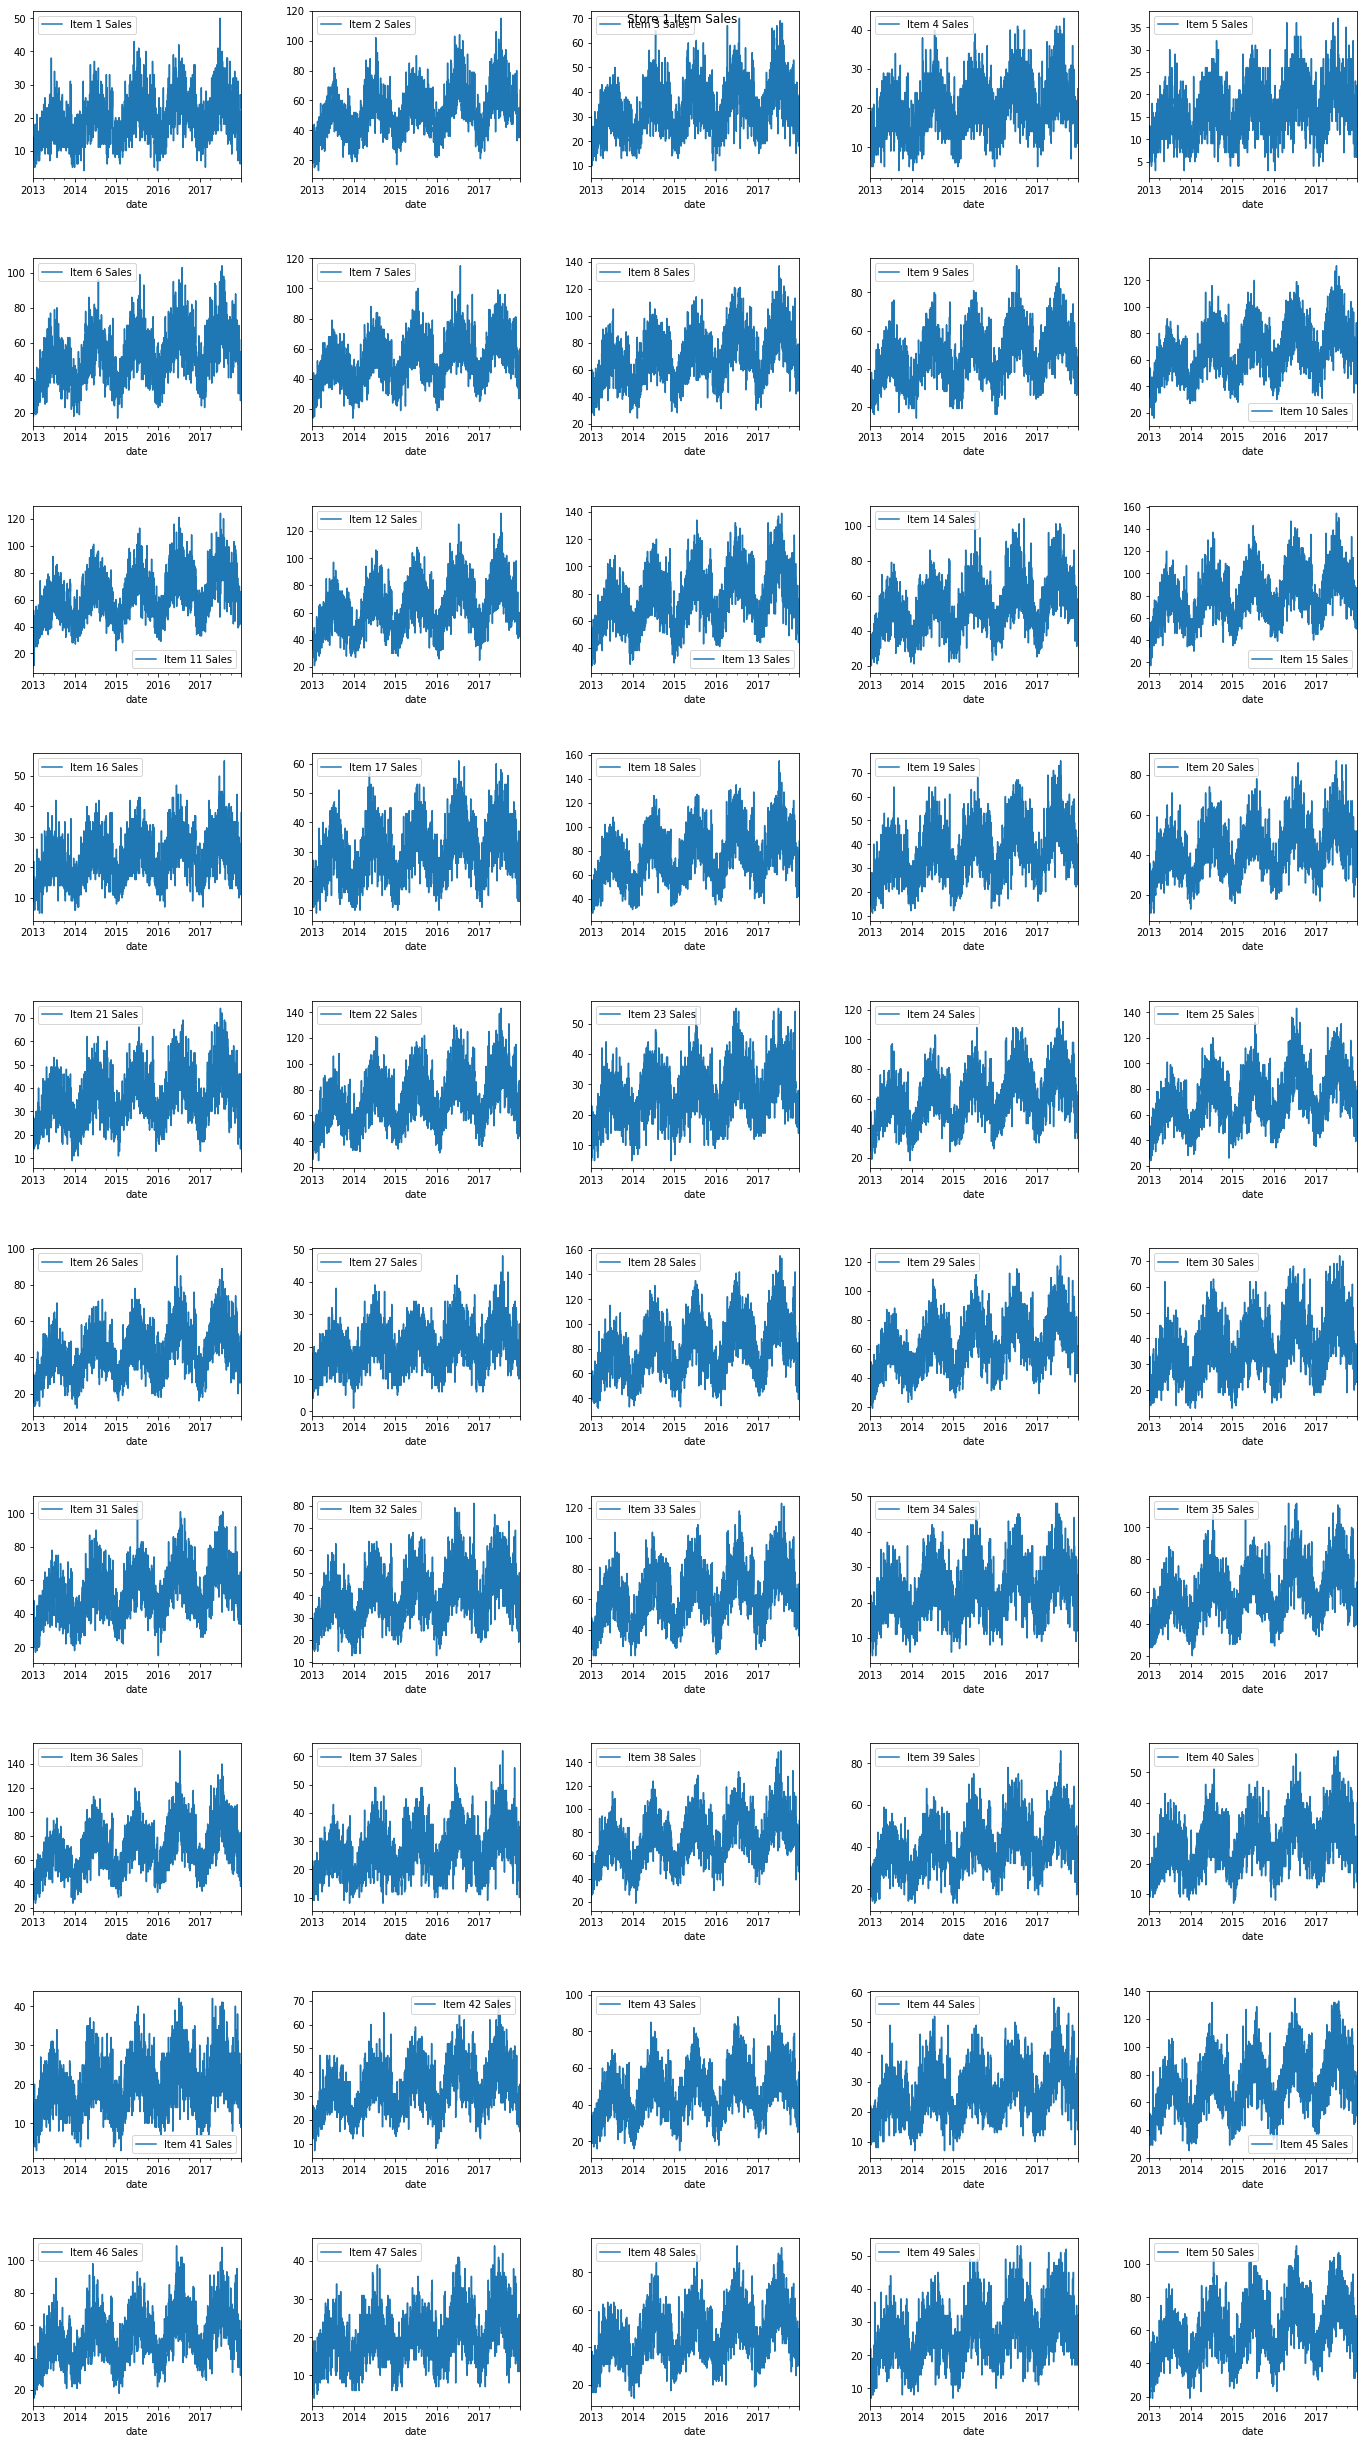

In [59]:
store = 1
sub = item_demand[item_demand.store == store].set_index("date")

fig, axes = plt.subplots(10, 5, figsize=(20, 35))
for i in range(1,51):
    if i < 6:
        sub[sub.item == i].sales.plot(ax=axes[0, i-1], legend=True, label = "Item "+str(i)+" Sales")
    if i >= 6 and i<11:
        sub[sub.item == i].sales.plot(ax=axes[1, i - 6], legend=True, label = "Item "+str(i)+" Sales")
    if i >= 11 and i<16:
        sub[sub.item == i].sales.plot(ax=axes[2, i - 11], legend=True, label = "Item "+str(i)+" Sales")    
    if i >= 16 and i<21:
        sub[sub.item == i].sales.plot(ax=axes[3, i - 16], legend=True, label = "Item "+str(i)+" Sales")    
    if i >= 21 and i<26:
        sub[sub.item == i].sales.plot(ax=axes[4, i - 21], legend=True, label = "Item "+str(i)+" Sales")  
    if i >= 26 and i<31:
        sub[sub.item == i].sales.plot(ax=axes[5, i - 26], legend=True, label = "Item "+str(i)+" Sales")    
    if i >= 31 and i<36:
        sub[sub.item == i].sales.plot(ax=axes[6, i - 31], legend=True, label = "Item "+str(i)+" Sales")    
    if i >= 36 and i<41:
        sub[sub.item == i].sales.plot(ax=axes[7, i - 36], legend=True, label = "Item "+str(i)+" Sales")    
    if i >= 41 and i<46:
        sub[sub.item == i].sales.plot(ax=axes[8, i - 41], legend=True, label = "Item "+str(i)+" Sales") 
    if i >= 46 and i<51:
        sub[sub.item == i].sales.plot(ax=axes[9, i - 46], legend=True, label = "Item "+str(i)+" Sales") 
plt.tight_layout(pad=4.5)
plt.suptitle("Store 1 Item Sales");

Skew Dist: 0.8671122960235805
Kurtosis Dist: 0.5090704757198172


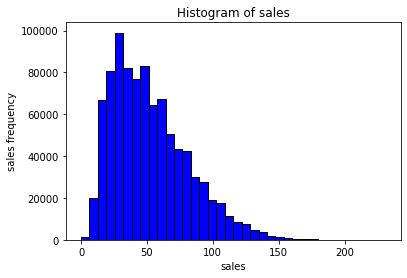

In [60]:
plt.hist(item_demand['sales'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))


plt.title('Histogram of sales')
plt.xlabel('sales')
plt.ylabel('sales frequency')

print('Skew Dist:',item_demand['sales'].skew())
print('Kurtosis Dist:',item_demand['sales'].kurt())

In [ ]:
#from the above diagram, We can see that our data is skewed to the right

Skew Dist: -0.375579598747413
Kurtosis Dist: -0.2389747199181107


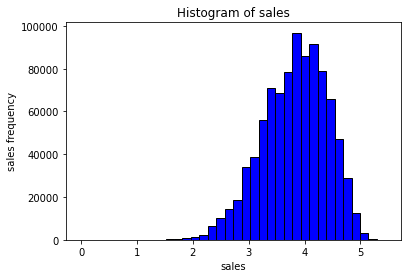

In [61]:
#Take log of sales to reduce skewness
item_demand['sales'] = np.log1p(item_demand.sales)


plt.hist(item_demand['sales'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

plt.title('Histogram of sales')
plt.xlabel('sales')
plt.ylabel('sales frequency')

print('Skew Dist:',item_demand['sales'].skew())
print('Kurtosis Dist:',item_demand['sales'].kurt())

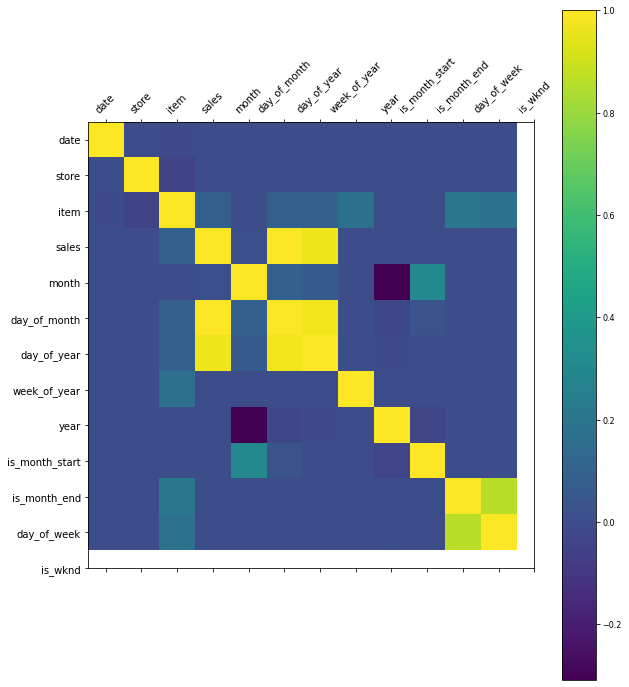

In [70]:
f = plt.figure(figsize=(10, 12))
plt.matshow(item_demand.corr(), fignum=f.number)
plt.xticks(range(item_demand.shape[1]), item_demand.columns, fontsize=10, rotation=45)
plt.yticks(range(item_demand.shape[1]), item_demand.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)

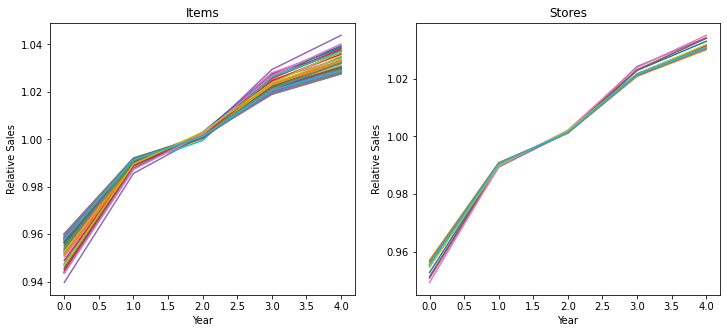

In [63]:
agg_year_item = pd.pivot_table(item_demand, index='year', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_year_store = pd.pivot_table(item_demand, index='year', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.show()

In [ ]:
#from the above diagram, all items and stores seem to enjoy a similar growth in sales over the years.


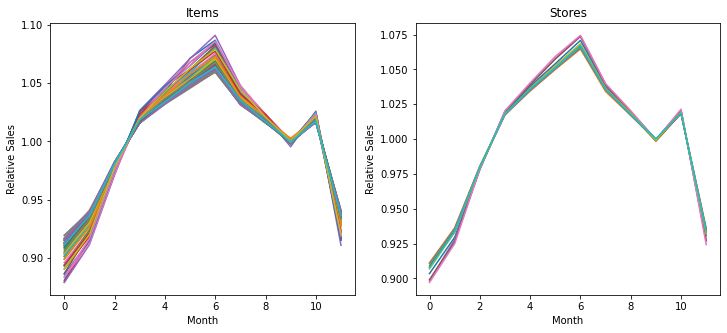

In [64]:
agg_month_item = pd.pivot_table(item_demand, index='month', columns='item',
                                values='sales', aggfunc=np.mean).values
agg_month_store = pd.pivot_table(item_demand, index='month', columns='store',
                                 values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_month_item / agg_month_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_month_store / agg_month_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.show()

In [ ]:
#from the above diagram, all items and stores seem to share a common pattern in sales over the months as well.


In [65]:
item_demand.head(2)

,date,store,item,sales,month,day_of_month,day_of_year,week_of_year,year,is_month_start,is_month_end
0,2013-01-01,1,1,2.639057,1,1,1,1,2013,1,0
1,2013-01-02,1,1,2.484907,1,2,2,1,2013,0,0


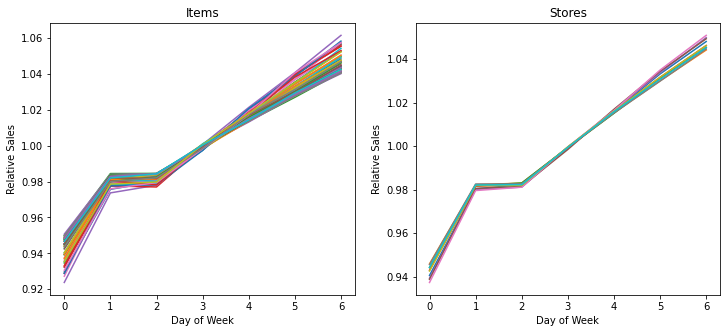

In [68]:
agg_dow_item = pd.pivot_table(item_demand, index='day_of_week', columns='item',
                              values='sales', aggfunc=np.mean).values
agg_dow_store = pd.pivot_table(item_demand, index='day_of_week', columns='store',
                               values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_dow_item / agg_dow_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Day of Week")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_dow_store / agg_dow_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Day of Week")
plt.ylabel("Relative Sales")
plt.show()


In [ ]:
#All items and stores also seem to share a common pattern in sales over the days of the week as well.

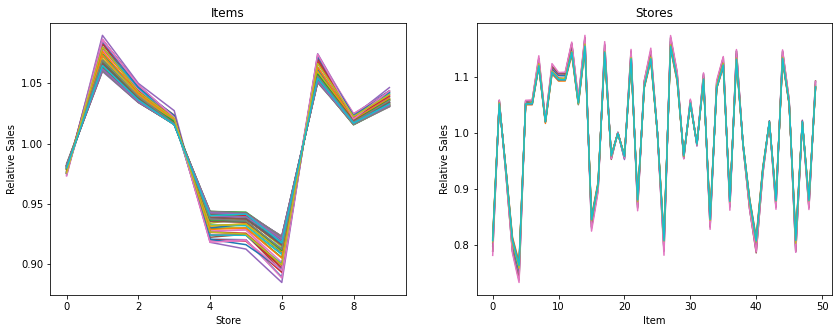

In [ ]:
agg_store_item = pd.pivot_table(item_demand, index='store', columns='item',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(agg_store_item / agg_store_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Store")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_store_item.T / agg_store_item.T.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Item")
plt.ylabel("Relative Sales")
plt.show()

In [69]:
#Same here. Just a constant pattern and no degeneracies. So, you just need a model for how items sell at different stores, which is easily captured by an average sales look-up table or yet another relative sales pattern model.